# Temps d'exécution pour la multiplication des matrices

Import des librairies necessaires pour les graphiques

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Matrices

Les matrices utilisées sont les suivantes:

- M1: A(10x30) B(30x20)
- M2: A(20x60) B(60x40)
- M3: A(40x120) B(120x80)
- M4: A(80x240) B(240x160)
- M5: A(160x480) B(480x320)
- M6: A(320x960) B(960x640)

La fonction pour dessiner les graphiques:

In [12]:
def plot_times(n, total_map, total_reduce, scale, step):
    ind = np.arange(n)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, total_map, width)
    p2 = plt.bar(ind, total_reduce, width, bottom=total_map)
    
    plt.xticks(ind, ('M1', 'M2', 'M3', 'M4', 'M5'))
    plt.yticks(np.arange(0, scale, step))
    plt.legend((p1[0], p2[0]), ('Map', 'Reduce'))

    plt.show()

## Hadoop MapReduce

### L'algorithme simple

Mesures prises avec un seul reduceur.

#### Le temps de ressources machine

Le temps d'exécution de resources machine est fourni par les compteurs de performances de Hadoop `Job Counters`.
Nous nous sommes intéressés particulièrement aux paramètre `Total time spent by all map tasks (ms)` et
`Total time spent by all reduce tasks (ms)`. Ils fournissent le temps que chaque mappeur et reduceurs utilise 
pour son exécution.

il faut préciser que le temps donné n'est pas celui ressenti par l'utilisateur. C'est le temps total comme si
les mappeurs et reduceurs étaient exécutés en séquentiel alors qu'en réalité ils sont exécutés en parallèle.

C'est important de prendre en compte ce temps et non celui de l'utilisateur car il sera prix en compte pour la facturation par le fournisseur cloud Hadoop.

<IPython.core.display.Javascript object>


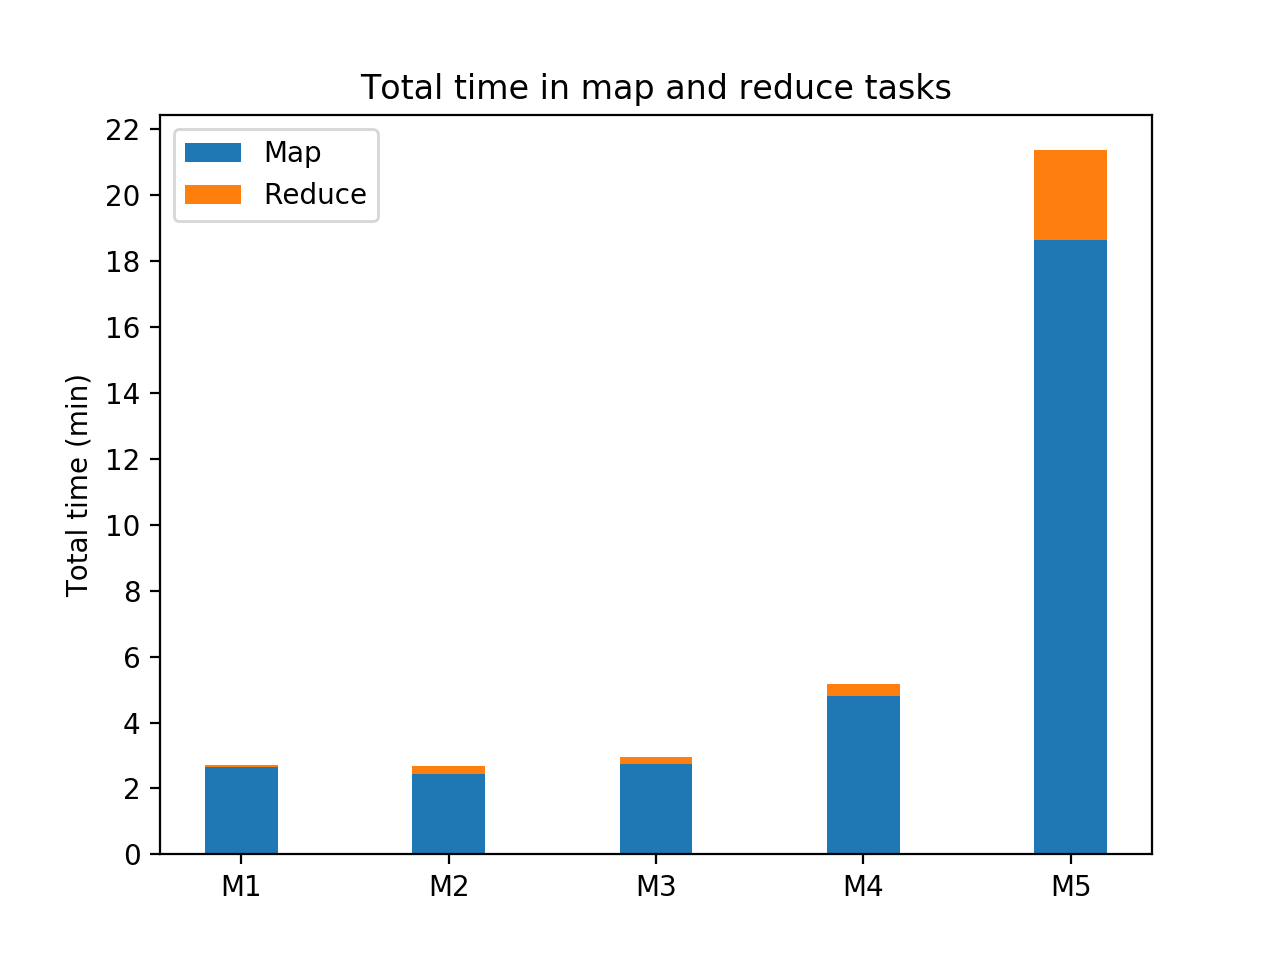

In [15]:
total_time_map_tasks = (158784/60000, 147101/60000, 163655/60000, 288566/60000, 1117308/60000)
total_time_reduce_tasks = (4410/60000, 14077/60000, 13415/60000, 21660/60000, 163731/60000)

plt.figure()
plt.ylabel('Total time (min)')
plt.title('Total time in map and reduce tasks')

plot_times(5, total_time_map_tasks, total_time_reduce_tasks, 24, 2)

#### Le temps utilisateur

Le temps utilisateur c'est le temps ressenti par l'utilisateur quant à l'exécution du job. C'est à dire que s'il y a plusieurs mappeurs qui s'exécutent en parrallèle, le temps reporté pour la tâche map sera celui du mappeut le plus lent.

Pour cela il faut diviser le temps `Total time spent by all map tasks (ms)` par le nombre de mappeurs qui s'éxecutaient pendent le job. Pareil pour les reduceurs.

<IPython.core.display.Javascript object>


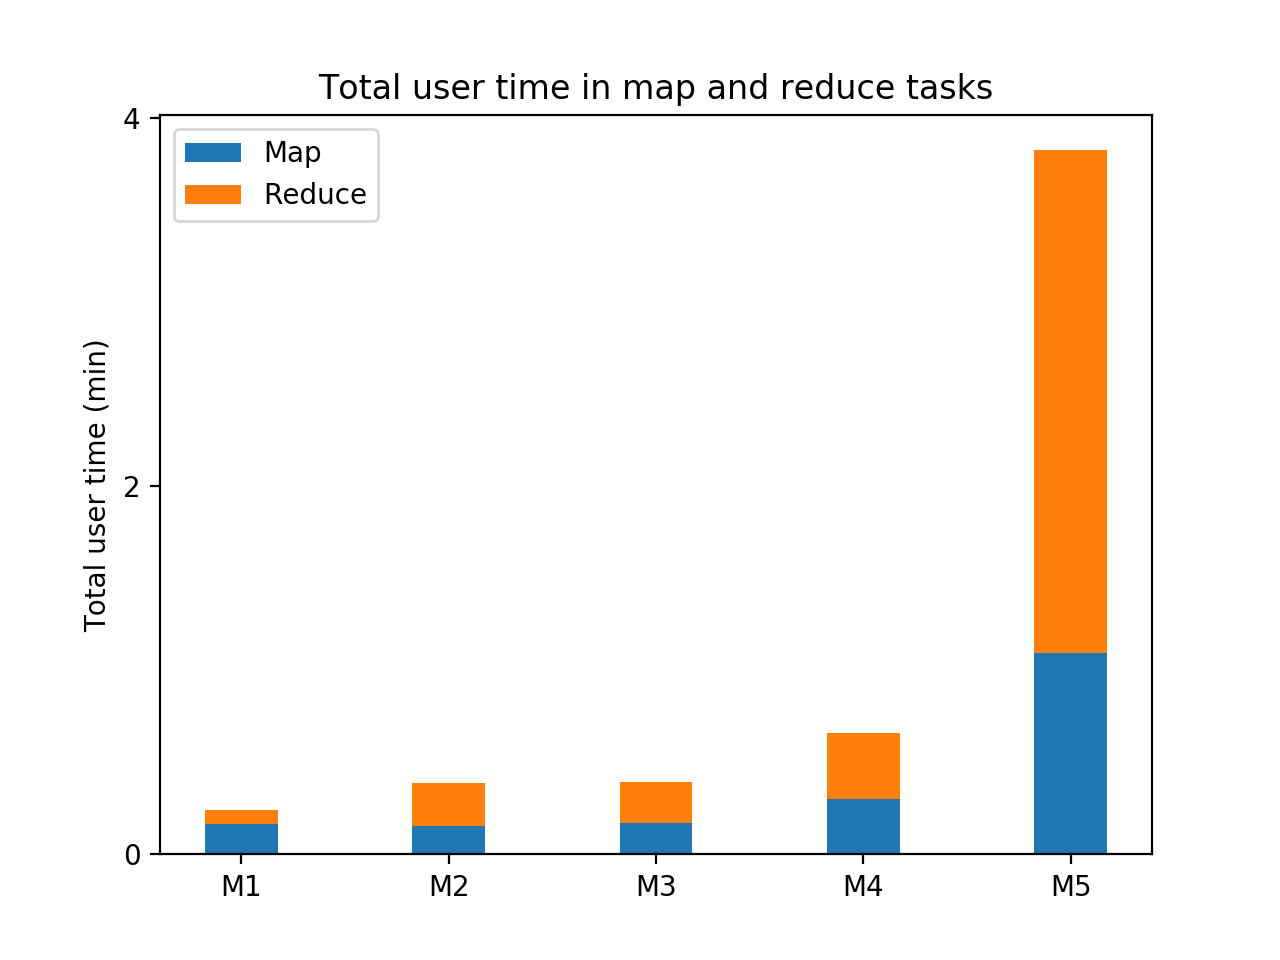

In [16]:
total_time_per_map = (158784/16/60000, 147101/16/60000, 163655/16/60000, 288566/16/60000, 1117308/17/60000)
total_time_per_reducer = (4410/60000, 14077/60000, 13415/60000, 21660/60000, 163731/60000)

plt.figure()
plt.ylabel('Total user time (min)')
plt.title('Total user time in map and reduce tasks')

plot_times(5, total_time_per_map, total_time_per_reducer, 5, 2)